In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
from datetime import datetime

In [2]:
df = pd.read_csv('practice_data/kelu.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8757 entries, 0 to 8756
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     8757 non-null   object
 1   rating     8757 non-null   int64 
 2   time       8757 non-null   object
 3   year       8757 non-null   int64 
 4   amount     8757 non-null   int64 
 5   frequency  8757 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 410.6+ KB


## 分析数据

### a1. 每天销量分析

<Axes: xlabel='time'>

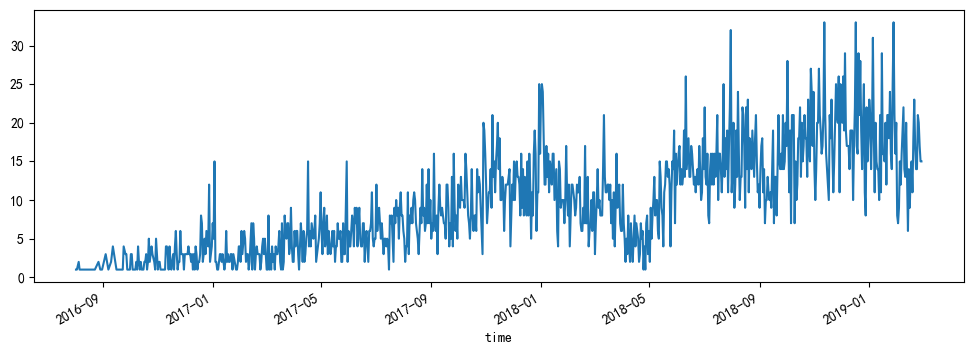

In [6]:
#转换日期格式
df['time'] = pd.to_datetime(df['time'], format='%Y/%m/%d')

df.groupby('time')['rating'].count().plot(figsize=(12,4))
#整体呈上升趋势，18年2-4月份出现较大波动，销量急剧下滑

### a2. 每月销量分析

Text(0.5, 1.0, '16-19年每月销量分析')

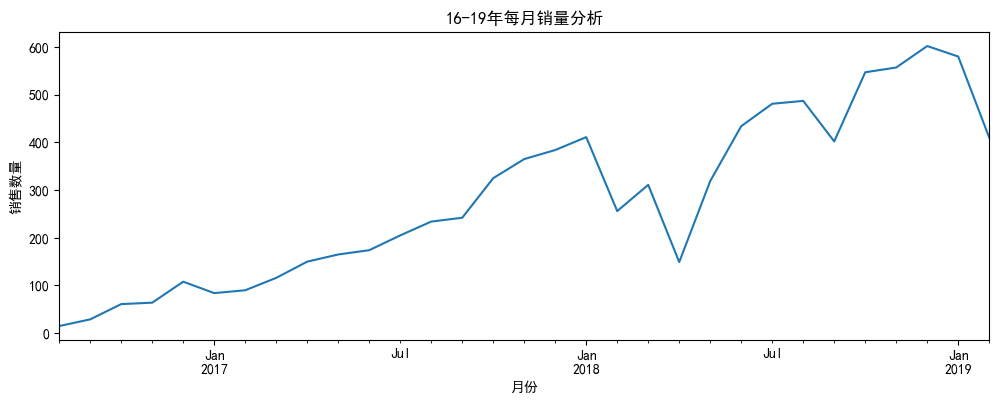

In [8]:
df['month'] = df['time'].values.astype('datetime64[M]')
df.groupby('month')['rating'].count().plot(figsize=(12,4))
plt.xlabel('月份')
plt.ylabel('销售数量')
plt.title('16-19年每月销量分析')

### a3. 每个用户购买量和消费金额分析

Text(0.5, 1.0, '用户购买次数和消费金额关系图')

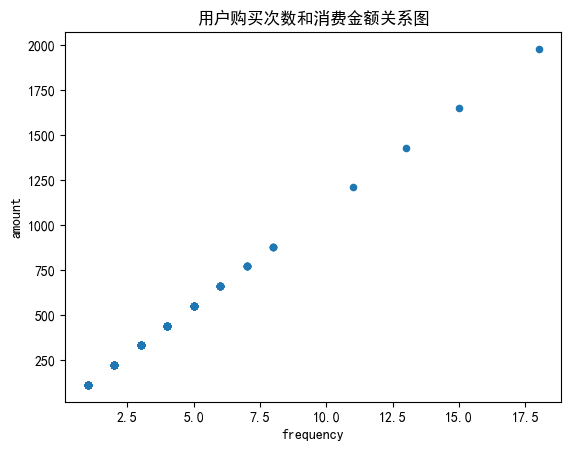

In [11]:
grouped_count_visitor = df.groupby('author')['frequency'].count().reset_index()
grouped_sum_amount = df.groupby('author')['amount'].sum().reset_index()
user_purchase_retention = pd.merge(left=grouped_count_visitor, right=grouped_sum_amount, on='author', how='inner')
user_purchase_retention.plot.scatter(x='frequency', y='amount')
plt.title('用户购买次数和消费金额关系图')

## b1. 用户购买门票数量分析

Text(0.5, 1.0, '用户购买数量直方图')

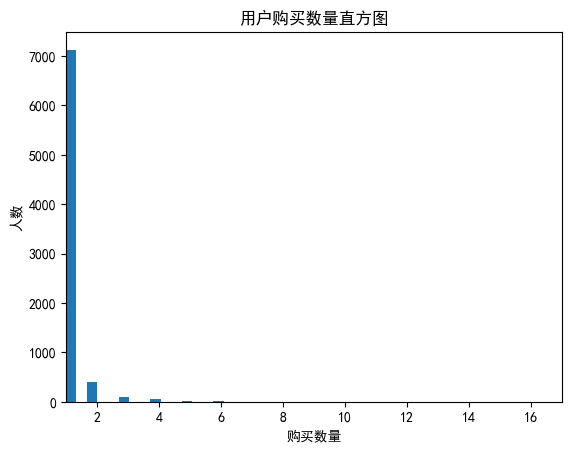

In [13]:
df.groupby('author')['frequency'].count().plot.hist(bins=50)
plt.xlim(1,17)
plt.xlabel('购买数量')
plt.ylabel('人数')
plt.title('用户购买数量直方图')

## b2. 用户购买门票数量2次及以上分析

Text(0.5, 1.0, '购买门票在2次及以上的用户数量')

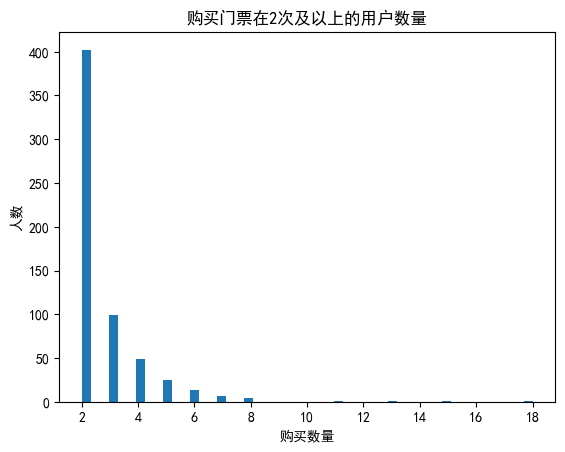

In [19]:
df_frequency_2 = df.groupby('author').count().reset_index()
df_frequency_2[df_frequency_2['frequency'] >= 2].groupby('author')['frequency'].sum().plot.hist(bins=50)
plt.xlabel('购买数量')
plt.ylabel('人数')
plt.title('购买门票在2次及以上的用户数量')

## b3. 用户购买门票数量1-5次之间分析

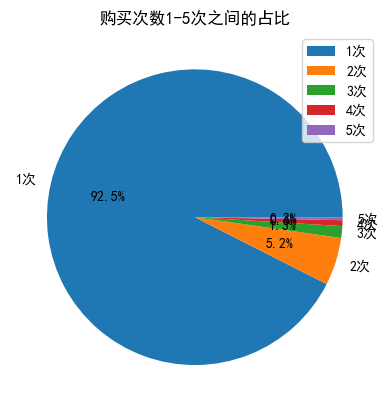

In [27]:
df_frequency_gte1 = df.groupby('author')['frequency'].count().reset_index()
df_frequency_gte1 = df_frequency_gte1[df_frequency_gte1['frequency'] >= 1]
values = list(df_frequency_gte1[df_frequency_gte1['frequency'] <= 5].groupby('frequency')['frequency'].count())
labels = ['1次','2次','3次','4次','5次']
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('购买次数1-5次之间的占比')
plt.legend()

## b4. 用户购买门票数量2-5次之间分析

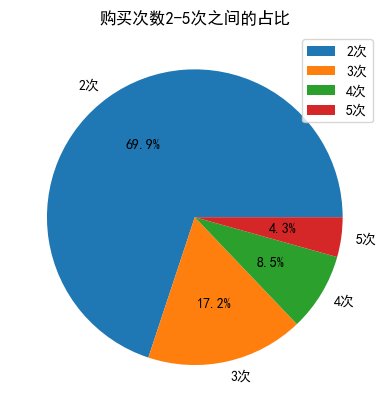

In [28]:
df_frequency_gte1 = df.groupby('author')['frequency'].count().reset_index()
df_frequency_gte1 = df_frequency_gte1[df_frequency_gte1['frequency'] >= 2]
values = list(df_frequency_gte1[df_frequency_gte1['frequency'] <= 5].groupby('frequency')['frequency'].count())
labels = ['2次','3次','4次','5次']
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('购买次数2-5次之间的占比')
plt.legend()

## c1. 复购率分析

In [39]:
pivot_count = df.pivot_table(index='author', columns='month', values='frequency', aggfunc='count').fillna(0)

In [40]:
pivot_count = pivot_count.applymap(lambda x: 1 if x>1 else np.NAN  if x==0 else 0)
pivot_count

month,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,...,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01
author,,,,,,,,,,,,,,,,,,,,,
wenbiao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
Goh Yu Wen Eunice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hui Shan,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Huihui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KO-CHENG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
芊羽,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
華山,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
蘇,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, '16-19年每月用户复购率')

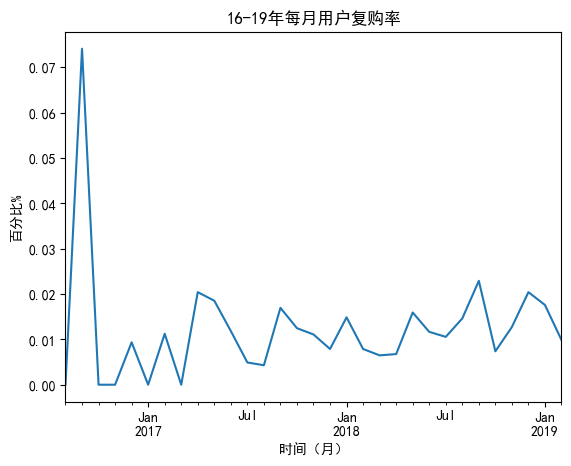

In [42]:
(pivot_count.sum()/pivot_count.count()).plot()
plt.xlabel('时间（月）')
plt.ylabel('百分比%')
plt.title('16-19年每月用户复购率')

## c2. 复购用户人数

Text(0.5, 1.0, '16-19年每月用户复购人数')

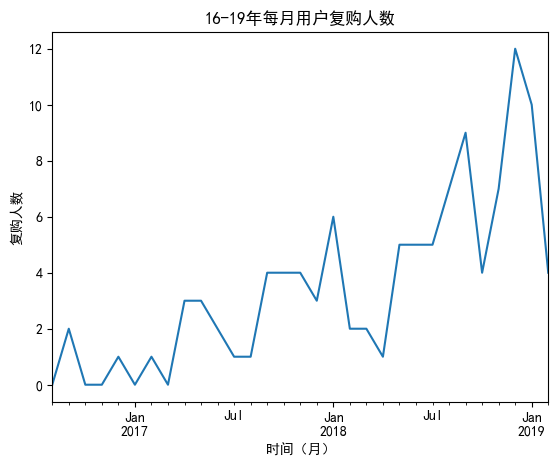

In [43]:
pivot_count.sum().plot()
plt.xlabel('时间（月）')
plt.ylabel('复购人数')
plt.title('16-19年每月用户复购人数')

## c3. 回购率分析

In [46]:
pivot_purchase = df.pivot_table(index='author',columns='month',values='frequency',aggfunc='count').fillna(0)
pivot_purchase

month,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,...,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01
author,,,,,,,,,,,,,,,,,,,,,
wenbiao,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Goh Yu Wen Eunice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hui Shan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Huihui,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KO-CHENG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
芊羽,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
華山,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
蘇,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
def purchase_return(data):
    status = []
    for i in range(30):
        if data[i]==1:
            if data[i+1]==1:
                status.append(1)
            else:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return pd.Series(status, pivot_purchase.columns)

In [56]:
pivot_purchase_return = pivot_purchase.apply(purchase_return, axis=1)
pivot_purchase_return

month,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,...,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01
author,,,,,,,,,,,,,,,,,,,,,
wenbiao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
Goh Yu Wen Eunice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hui Shan,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Huihui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KO-CHENG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
芊羽,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
華山,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
蘇,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, '回购率')

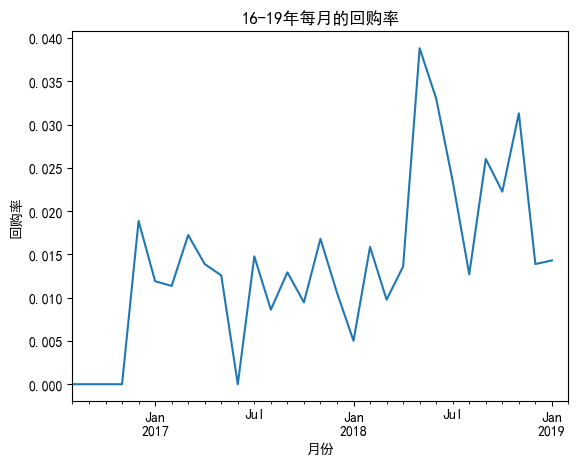

In [57]:
(pivot_purchase_return.sum() / pivot_purchase_return.count()).plot()
plt.title('16-19年每月的回购率')
plt.xlabel('月份')
plt.ylabel('回购率')

## c4.回购人数分析

Text(0, 0.5, '回购人数')

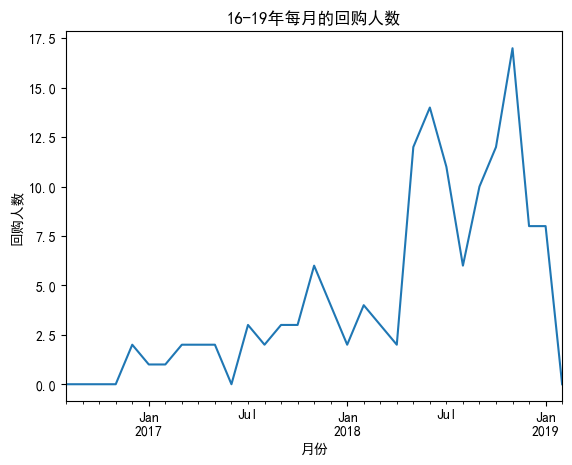

In [58]:
(pivot_purchase_return.sum()).plot()
plt.title('16-19年每月的回购人数')
plt.xlabel('月份')
plt.ylabel('回购人数')

## c5. 每个月分层用户占比情况

In [60]:
def active_status(data):
    status = [] #存储18个月的状态
    for i in range(31):
        if data[i] == 0:
            if len(status) == 0:
                status.append('unreg')
            else:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return pd.Series(status, pivot_purchase.columns)

pivot_purchase_status = pivot_purchase.apply(active_status, axis=1)

In [63]:
pivot_status_count = pivot_purchase_status.replace('unreg', np.NaN).apply(pd.value_counts)

<Axes: xlabel='month'>

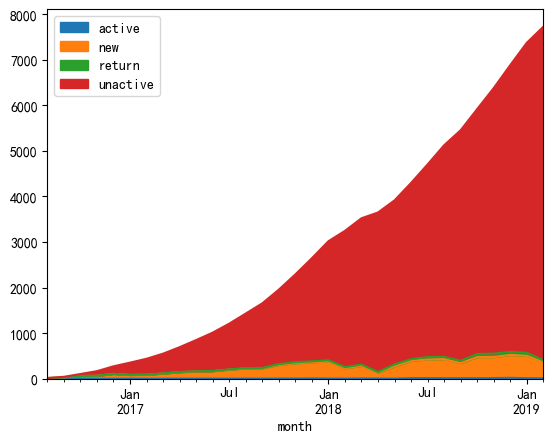

In [65]:
pivot_status_count.T.plot.area()

## c6. 每月不同用户的占比

<Axes: xlabel='month'>

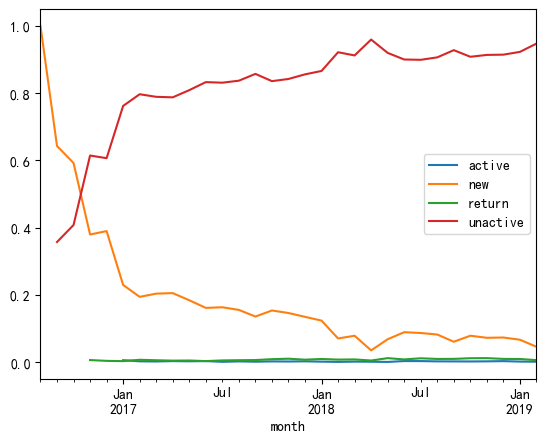

In [68]:
return_rate = pivot_status_count.apply(lambda x: x/ x.sum())
return_rate.T.plot()

## C7. 每月活跃用户占比

Text(0.5, 1.0, '每月活跃用户占比分析')

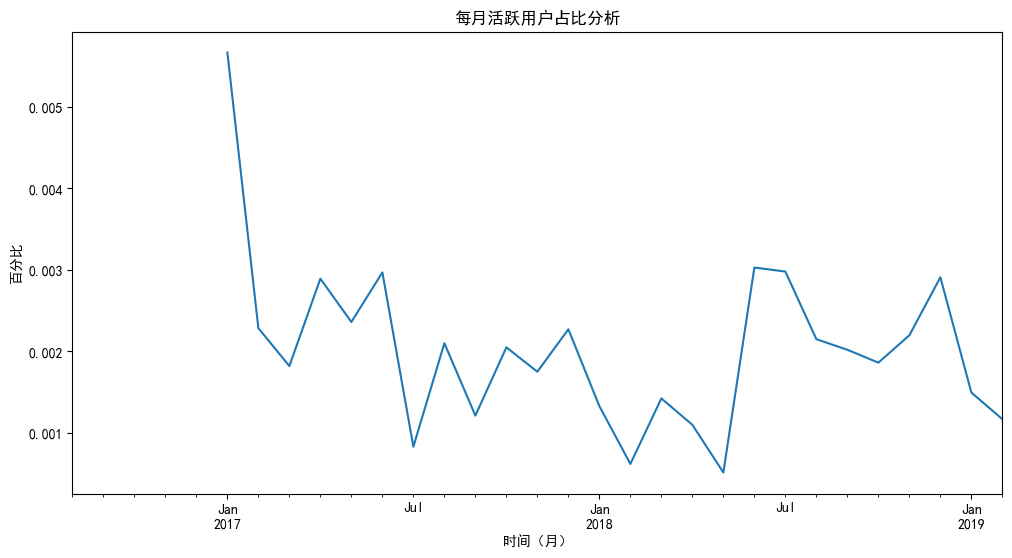

In [70]:
return_rate.T['active'].plot(figsize=(12,6))
plt.xlabel('时间（月）')
plt.ylabel('百分比')
plt.title('每月活跃用户占比分析')

## C8. 每月回流用户占比

Text(0.5, 1.0, '每月回流用户占比分析')

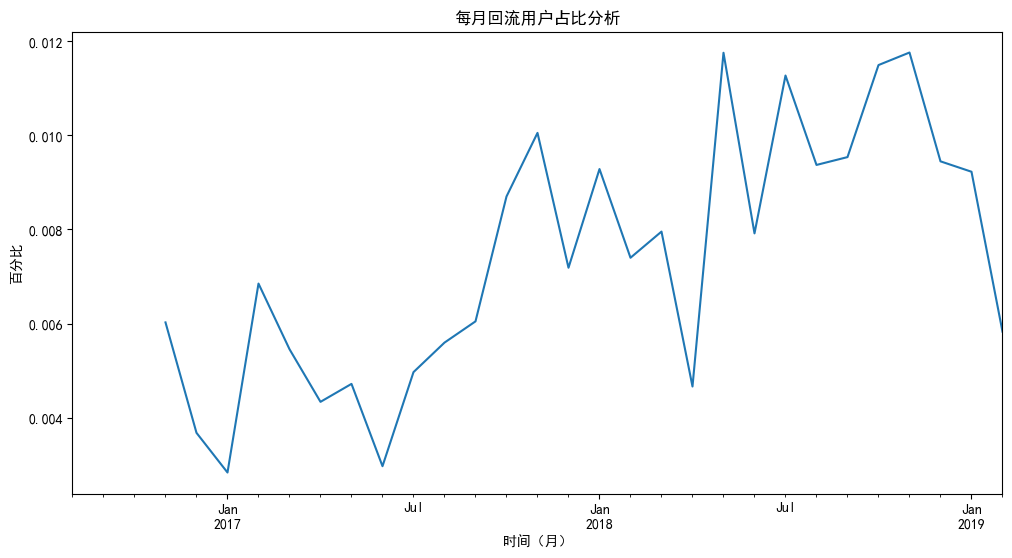

In [71]:
return_rate.T['return'].plot(figsize=(12,6))
plt.xlabel('时间（月）')
plt.ylabel('百分比')
plt.title('每月回流用户占比分析')

## d1. 用户生命周期

In [72]:
time_min = df.groupby('author')['time'].min()
time_max = df.groupby('author')['time'].max()
life_time = (time_max-time_min).reset_index()
life_time.describe()

,time
count,7722
mean,23 days 01:45:32.867132867
std,98 days 16:47:46.849668504
min,0 days 00:00:00
25%,0 days 00:00:00
50%,0 days 00:00:00
75%,0 days 00:00:00
max,864 days 00:00:00


## d2. 用户生命周期直方图

Text(0.5, 1.0, '所有用户生命周期直方图')

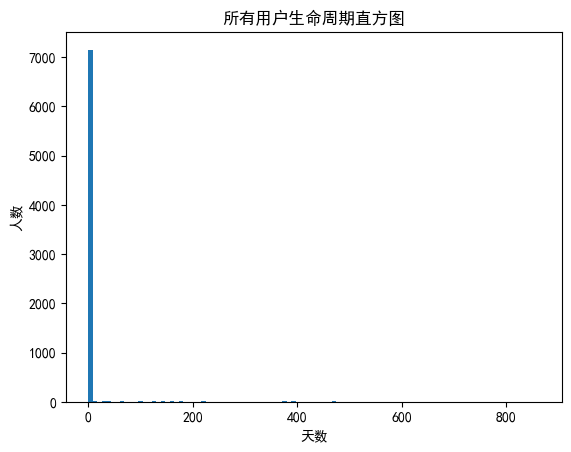

In [74]:
life_time['life_time'] = life_time['time'] / np.timedelta64(1, 'D')
life_time['life_time'].plot.hist(bins=100)
plt.xlabel('天数')
plt.ylabel('人数')
plt.title('所有用户生命周期直方图')

## d3.生命周期大于0天用户

Text(0.5, 1.0, '生命周期在0天以上用户分布直方图')

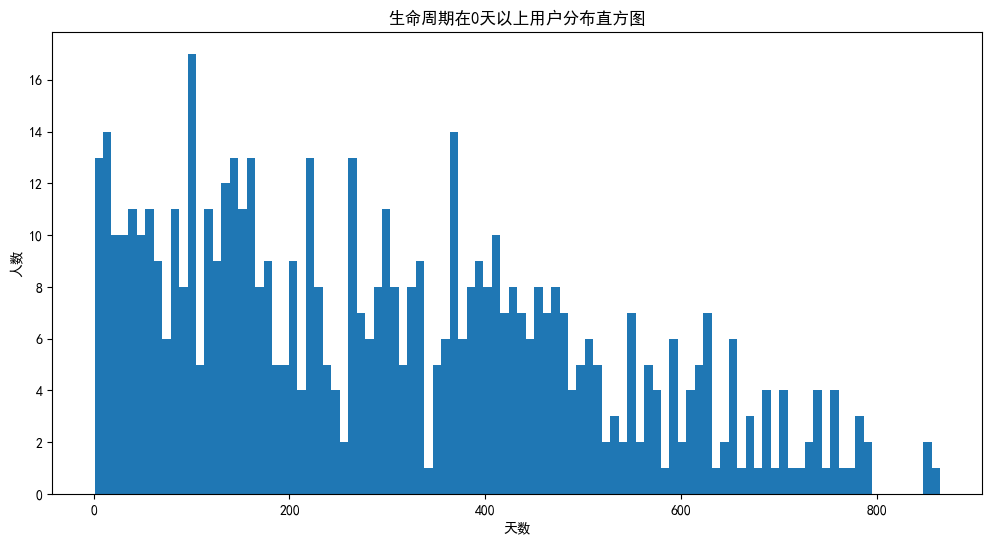

In [77]:
life_time[life_time['life_time']>0]['life_time'].plot.hist(bins=100, figsize=(12,6))
plt.xlabel('天数')
plt.ylabel('人数')
plt.title('生命周期在0天以上用户分布直方图')

## d4. 各时间段用户留存率

In [80]:
#留存率：1-90天有多少留存用户
#留存天数计算方式：用户每一次的消费时间减去第一次消费的时间
usser_purchase_retention = pd.merge(left=df,right=time_min.reset_index(),on='author',how='inner',suffixes=['','_min']) 
#计算留存天数
usser_purchase_retention['time_diff'] = usser_purchase_retention['time'] - usser_purchase_retention['time_min']
usser_purchase_retention['time_diff'] = usser_purchase_retention['time_diff'].apply(lambda x: x/np.timedelta64(1,'D'))
#生成时间跨度，判断属于哪个区间
bin = [i*90 for i in range(11)]
usser_purchase_retention['time_diff_bin'] = pd.cut(usser_purchase_retention['time_diff'], bin)
usser_purchase_retention

,author,rating,time,year,amount,frequency,month,time_min,time_diff,time_diff_bin
0,YOUNG,60,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0.0,NaN
1,SHING YAN,100,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0.0,NaN
2,Sha,60,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0.0,NaN
3,Mary Mae,100,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0.0,NaN
4,Maria Cristina,100,2019-02-28,2019,110,1,2019-02-01,2017-06-27,611.0,"(540.0, 630.0]"
...,...,...,...,...,...,...,...,...,...,...
8752,CHI NANG,100,2016-08-07,2016,110,1,2016-08-01,2016-08-07,0.0,NaN
8753,Oliver Stephen Ah Kam,100,2016-08-05,2016,110,1,2016-08-01,2016-08-05,0.0,NaN
8754,Halley,100,2016-08-05,2016,110,1,2016-08-01,2016-08-05,0.0,NaN
8755,ANDREW WEIQIANG,100,2016-08-03,2016,110,1,2016-08-01,2016-08-03,0.0,NaN


Text(0.5, 1.0, '各时间段内的留存率')

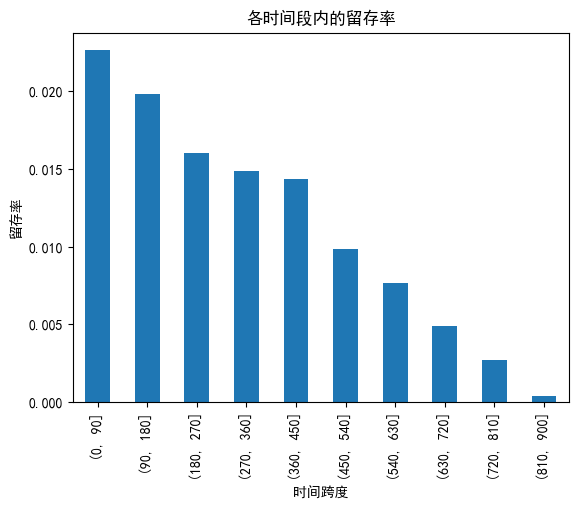

In [91]:
pivot_retention = usser_purchase_retention.groupby(['author', 'time_diff_bin'])['frequency'].sum().unstack()
#判断是否是留存用户
pivot_retention_trans = pivot_retention .applymap(lambda x: 1 if x > 0 else 0)
(pivot_retention_trans.sum() / pivot_retention_trans.count()).plot(kind='bar')
plt.xlabel('时间跨度')
plt.ylabel('留存率')
plt.title('各时间段内的留存率')